In [0]:
# перезагрузить ноутбук
!kill -9 -1

# Генерирование фраз из отдельных слов. Или объединение трех (или несколько) аудиофайлов в один аудиопоток.

Используем эту программу для генерирования фраз содержащих ключевое слово (которое мы потом будем вытаскивать из фразы и распознавать).

Сгенерированные аудиопотоки содержатся в директории Audio_streams.

/content/Simple-Audio-Recognition/Audio_streams/right1_bed_dog

Слова для фраз берутся из директория My_Commands и My_Others:

/content/Simple-Audio-Recognition/MyRawAudio/My_Commands/mod_ee_right1.wav

/content/Simple-Audio-Recognition/MyRawAudio/My_Others/mod_bed.wav




In [1]:
!git clone https://github.com/smartsinovich/Simple-Audio-Recognition.git

Cloning into 'Simple-Audio-Recognition'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 293 (delta 41), reused 23 (delta 7), pack-reused 214
Receiving objects: 100% (293/293), 4.58 MiB | 28.43 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [2]:
!pip install soundfile

In [3]:
!pip install pydub

In [0]:
import os
import numpy as np
import keras
import math
from keras.models import load_model
from scipy.io import wavfile
from scipy.fftpack import dct
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt

import random
import itertools
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

%matplotlib inline





---



Из отдельных слов создаем фразу. 

а) Берем в произвольном 1 слово из директория My_commands. 

б) Берем в произвольном порядке 2 слова из директория My_others. 

в) соединяем в произвольном порядке выбранные слова. 

г) файл полученный в результате записываем в директорий Audio_streams



---



In [27]:
import wave
import os
import random


command_path = '/content/Simple-Audio-Recognition/MyRawAudio/My_Commands/'
other_path = '/content/Simple-Audio-Recognition/MyRawAudio/My_Others/'

def getRandomFile(path):
  #Returns a random filename, chosen among the files of the given path.
  files = os.listdir(path)
  index = random.randrange(0, len(files))
  return files[index]

files = getRandomFile(command_path)
sound_1 = command_path + '/' + files
print(files)
print(sound_1)

files = getRandomFile(other_path)
sound_2 = other_path + '/' + files
print(files)
print(sound_2)

files = getRandomFile(other_path)
sound_3 = other_path + '/' + files
print(files)
print(sound_3)


import random
infiles = [sound_1, sound_2, sound_3]
print(infiles)
# перетасовать список
r_infiles = random.sample(infiles, len(infiles))
#print(r_infiles)
sound_1 = r_infiles[0]
sound_2 = r_infiles[1]
sound_3 = r_infiles[2]



#====================
# имя аудиопотока

print(os.path.splitext(sound_1)[0])
s1= (os.path.splitext(sound_1)[0])
s1= (s1.split('_')[-1])
print(s1)

print(os.path.splitext(sound_2)[0])
s2= (os.path.splitext(sound_2)[0])
s2= (s2.split('/')[-1])
s2= (s2.split('_')[-1])
print(s2)

print(os.path.splitext(sound_3)[0])
s3= (os.path.splitext(sound_3)[0])
s3= (s3.split('/')[-1])
s3= (s3.split('_')[-1])
print(s3)

s= s1 + '_'+ s2 + '_' + s3 + '.wav' #имя аудиопотока (слова составляющие фразу)
print(s)
#==================
from pydub import AudioSegment
sound1_ = AudioSegment.from_wav(sound_1)
sound2_ = AudioSegment.from_wav(sound_2)
sound3_ = AudioSegment.from_wav(sound_3)
combined_sounds = sound1_ + sound2_ + sound3_ 
combined_sounds.export('/content/Simple-Audio-Recognition/Audio_streams/' + s, format="wav")
sounds = '/content/Simple-Audio-Recognition/Audio_streams/' + s
print(sounds)







mod_s_left.wav
/content/Simple-Audio-Recognition/MyRawAudio/My_Commands//mod_s_left.wav
mod_s_one.wav
/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_s_one.wav
mod_s_house.wav
/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_s_house.wav
['/content/Simple-Audio-Recognition/MyRawAudio/My_Commands//mod_s_left.wav', '/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_s_one.wav', '/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_s_house.wav']
/content/Simple-Audio-Recognition/MyRawAudio/My_Commands//mod_s_left
left
/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_s_one
one
/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_s_house
house
left_one_house.wav
/content/Simple-Audio-Recognition/Audio_streams/left_one_house.wav


In [28]:
import IPython.display as ipd
print(s)
ipd.Audio('/content/Simple-Audio-Recognition/Audio_streams/' + s)


left_one_house.wav


/content/Simple-Audio-Recognition/MyRawAudio/My_Commands//mod_s_left.wav
samples = 16000   sample rate = 16000   seconds = 1.0


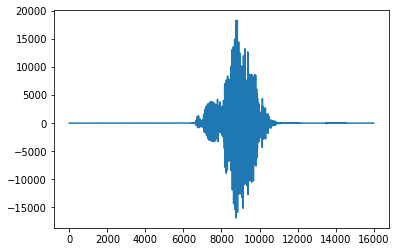

/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_s_one.wav
samples = 16000   sample rate = 16000   seconds = 1.0


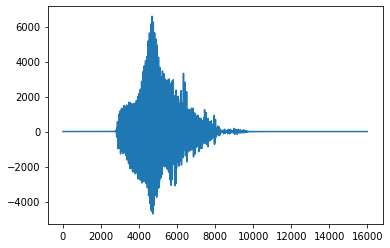

/content/Simple-Audio-Recognition/MyRawAudio/My_Others//mod_s_house.wav
samples = 16000   sample rate = 16000   seconds = 1.0


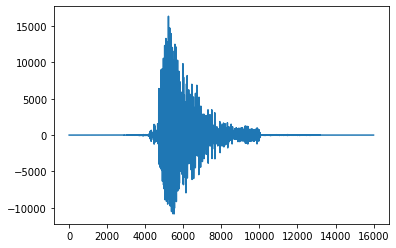

/content/Simple-Audio-Recognition/Audio_streams/left_one_house.wav
samples = 48000   sample rate = 16000   seconds = 3.0
16000 [0 0 0 ... 0 0 0]


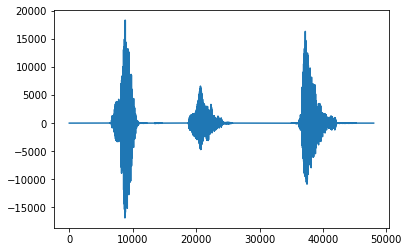

In [29]:
import soundfile as sf
from scipy.io import wavfile
import scipy.io.wavfile
import matplotlib.pyplot as plt


print(sound_1)
f = sf.SoundFile(sound_1)
print('samples = {}'.format(len(f)), '  sample rate = {}'.format(f.samplerate), '  seconds = {}'.format(len(f) / f.samplerate))
rate, data = scipy.io.wavfile.read(sound_1)
plt.plot(data)
plt.show()

print(sound_2)
f = sf.SoundFile(sound_2)
print('samples = {}'.format(len(f)), '  sample rate = {}'.format(f.samplerate), '  seconds = {}'.format(len(f) / f.samplerate))
rate, data = scipy.io.wavfile.read(sound_2)
plt.plot(data)
plt.show()

print(sound_3)
f = sf.SoundFile(sound_3)
print('samples = {}'.format(len(f)), '  sample rate = {}'.format(f.samplerate), '  seconds = {}'.format(len(f) / f.samplerate))
rate, data = scipy.io.wavfile.read(sound_3)
plt.plot(data)
plt.show()

print(sounds)
f = sf.SoundFile(sounds)
print('samples = {}'.format(len(f)), '  sample rate = {}'.format(f.samplerate), '  seconds = {}'.format(len(f) / f.samplerate))
rate, data = scipy.io.wavfile.read(sounds)
print(rate, data)
plt.plot(data)
plt.show()



---



---

